In [2]:
import cv2
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt
import pylab as pl

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
def normalize_grayscale(image, beta=0.75, image_id_k = 1, A_kp=None):
    N,M = image.shape
    k = image_id_k
    
    if image_id_k > 1 and  A_kp is None :
        print("please define A_kp as this is not the first image")
    elif image_id_k == 1:
        A_kp = np.zeros((N,M))
        
    alpha = beta*(k-1)/k
    a = np.mean(image, axis=0)
    A_k = alpha*A_kp + (1-alpha)*np.tile(a,(N,1))
    image = 128*(image/A_k)
    return image, A_k

In [4]:
img = cv2.imread('/Users/delinwang/Desktop/Concrete Crack Images for Classification.rar Folder/Positive/00001.jpg', 0).astype(np.float32)
img2, A_k = normalize_grayscale(img)

(227, 227)
(227, 227)


ModuleNotFoundError: No module named 'filters'

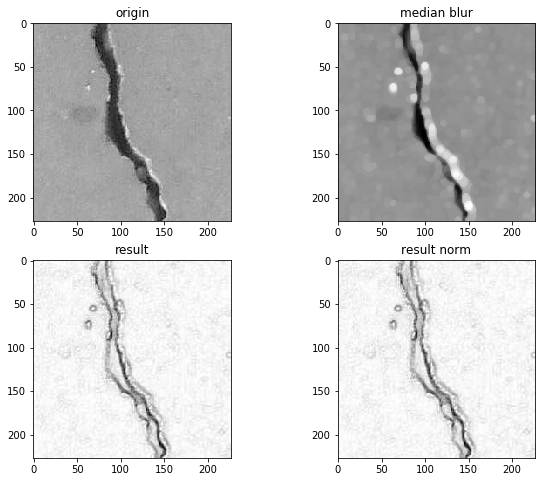

In [14]:
origin_img = img
result_planes = []
result_norm_planes = []
plane = origin_img.astype(np.uint8)
dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))

plt.subplot(221)
plt.imshow(origin_img, cmap='gray')
plt.title('origin')

dilated_img = dilated_img
bg_img = cv2.medianBlur(dilated_img, 5)

plt.subplot(222)
plt.imshow(bg_img, cmap='gray')
plt.title('median blur')

print(plane.shape) 
print(bg_img.shape)
cv2.absdiff(plane, bg_img)

diff_img = 255 - cv2.absdiff(plane, bg_img)
norm_img= diff_img
norm_img = cv2.normalize(diff_img, norm_img, alpha=0, 
                         beta=255, norm_type=cv2.NORM_MINMAX, 
                         dtype=cv2.CV_8UC1)
result_planes.append(diff_img)
result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm2 = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out.png', result)
cv2.imwrite('shadows_out_norm.png', result_norm2)

plt.subplot(223)
plt.imshow(result, cmap='gray')
plt.title('result')

plt.subplot(224)
plt.imshow(result_norm2, cmap='gray')
plt.title('result norm')

from filters.bilateral import bilateral_canny
bilateral_canny_video = bilateral_canny()

img2 = bilateral_canny_video.canny_img(result)


plt.imshow(img2, cmap='gray')
plt.title('Original')
plt.show

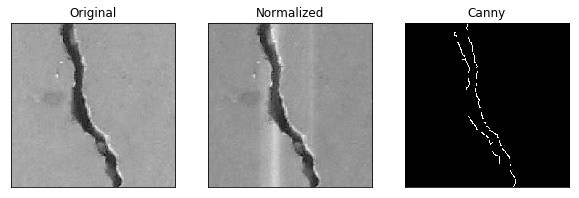

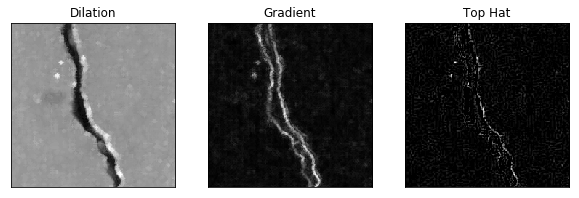

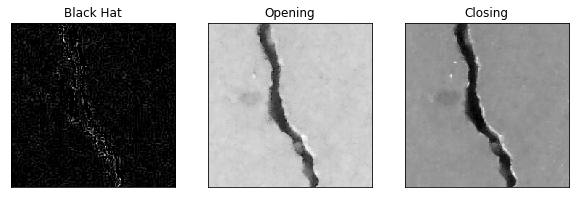

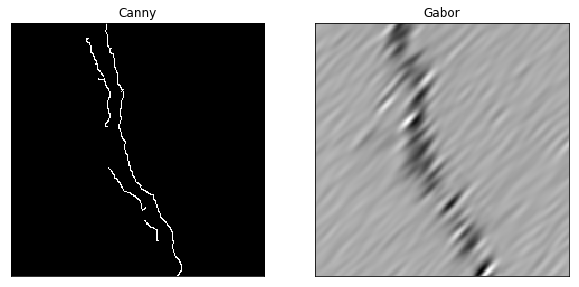

In [17]:
#kernel = cv2.getStructuringElement(cv.MORPH_RECT,(5,5))
#kernel = cv2.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)

img2 = np.uint8(img2)
blur = cv2.bilateralFilter(img2,10,20,20)
blur = np.uint8(blur)
canny = cv2.Canny(blur,100,200)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(img, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(img2, cmap='gray')
plt.title('Normalized'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(canny, cmap='gray')
#plt.title('Erosion'),plt.xticks([]),plt.yticks([])
plt.title('Canny'),plt.xticks([]),plt.yticks([])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(dilation, cmap='gray')
plt.title('Dilation'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(gradient, cmap='gray')
plt.title('Gradient'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(tophat, cmap='gray')
plt.title('Top Hat'),plt.xticks([]),plt.yticks([])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(blackhat, cmap='gray')
plt.title('Black Hat'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(opening, cmap='gray')
plt.title('Opening'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(closing, cmap='gray')
plt.title('Closing'),plt.xticks([]),plt.yticks([])
plt.show()


ksize = 31
sigma = 4
theta = np.pi/4
lm = 10
gamma = 0.5
psi = 0
gabor = cv2.getGaborKernel((ksize,ksize), sigma, theta, lm, gamma, psi)

#apply filter
dstx = cv2.filter2D(img,-1, gabor)


plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(canny, cmap='gray')
plt.title('Canny'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(np.abs(dstx), cmap='gray')
plt.title('Gabor'),plt.xticks([]),plt.yticks([])
plt.show()

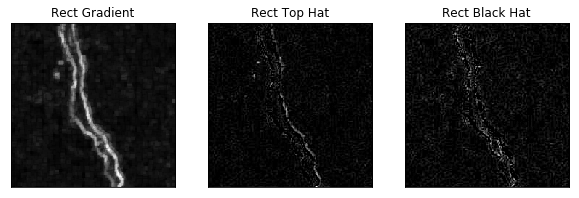

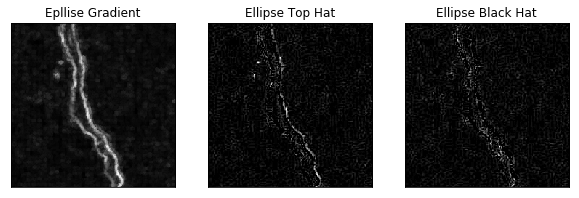

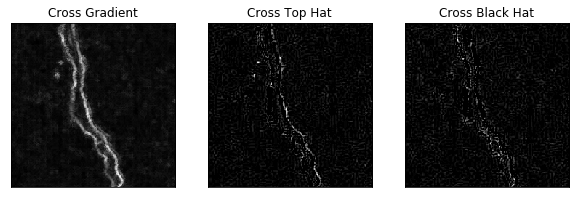

In [16]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))



gradient1 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel1)
tophat1 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel1)
blackhat1 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel1)

gradient2 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel2)
tophat2 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel2)
blackhat2 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel2)

gradient3 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel3)
tophat3 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel3)
blackhat3 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel3)

plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(gradient1, cmap='gray')
plt.title('Rect Gradient'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(tophat1, cmap='gray')
plt.title('Rect Top Hat'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(blackhat1, cmap='gray')
plt.title('Rect Black Hat'),plt.xticks([]),plt.yticks([])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(gradient2, cmap='gray')
plt.title('Epllise Gradient'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(tophat2, cmap='gray')
plt.title('Ellipse Top Hat'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(blackhat2, cmap='gray')
plt.title('Ellipse Black Hat'),plt.xticks([]),plt.yticks([])
plt.show()


plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(gradient3, cmap='gray')
plt.title('Cross Gradient'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(tophat3, cmap='gray')
plt.title('Cross Top Hat'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(blackhat3, cmap='gray')
plt.title('Cross Black Hat'),plt.xticks([]),plt.yticks([])
plt.show()

In [65]:
combined = np.multiply(gradient1,gradient2)
#combined = np.multiply(combined,gradient3)
#combined = gradient1+gradient2+gradient3

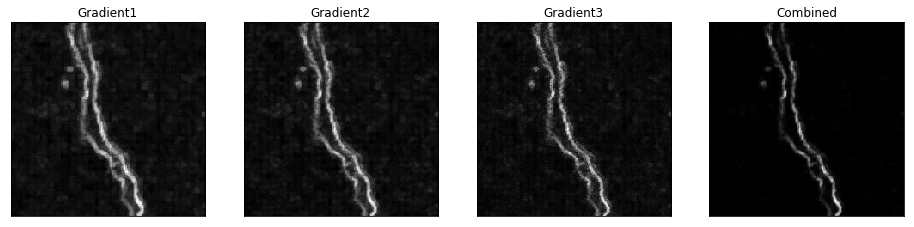

In [66]:
plt.figure(figsize=(16,5))
plt.subplot(141),plt.imshow(gradient1, cmap='gray')
plt.title('Gradient1'),plt.xticks([]),plt.yticks([])
plt.subplot(142),plt.imshow(gradient2, cmap='gray')
plt.title('Gradient2'),plt.xticks([]),plt.yticks([])
plt.subplot(143),plt.imshow(gradient3, cmap='gray')
plt.title('Gradient3'),plt.xticks([]),plt.yticks([])
plt.subplot(144),plt.imshow(combined, cmap='gray')
plt.title('Combined'),plt.xticks([]),plt.yticks([])
plt.show()

In [67]:
import pandas as pd

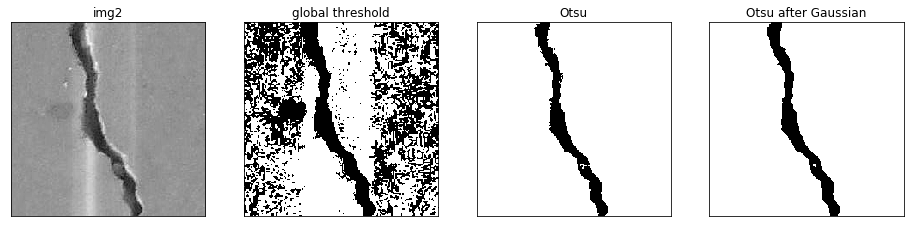

In [68]:
# global thresholding
#img2 = np.uint8(img2)
ret1,th1 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img2,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img2, 0, th1,
          img2, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(16,5))
plt.subplot(141),plt.imshow(img2, cmap='gray')
plt.title('img2'),plt.xticks([]),plt.yticks([])
plt.subplot(142),plt.imshow(th1, cmap='gray')
plt.title('global threshold'),plt.xticks([]),plt.yticks([])
plt.subplot(143),plt.imshow(th2, cmap='gray')
plt.title('Otsu'),plt.xticks([]),plt.yticks([])
plt.subplot(144),plt.imshow(th3, cmap='gray')
plt.title('Otsu after Gaussian'),plt.xticks([]),plt.yticks([])
plt.show()

In [44]:
d = {'Gabor' : pd.Series([1., 0.00833333, 0.76666667,0.98333333,0.575,0.43333333,0.625,0.983333], 
                         index=['SVM pos', 'SVM neg', 'logistic pos', 'logistic neg',
                                'knn pos','knn neg','linear reg pos','linear reg neg']),
     'Bilateral+Canny' : pd.Series([1., 0.65833333, 0.99166667, 0.96666667,0.3166667, 0.10833333,0.5,0.966667], 
                        index=['SVM pos', 'SVM neg', 'logistic pos', 'logistic neg',
                                'knn pos','knn neg','linear reg pos','linear reg neg']),
     'Gradient' : pd.Series([1., 0., 0.725, 0.975,0.575, 1,0.883333333,0.975], 
                        index=['SVM pos', 'SVM neg', 'logistic pos', 'logistic neg',
                                'knn pos','knn neg','linear reg pos','linear reg neg']),
     'TopHat' : pd.Series([0.96666667,0.41666667, 0.65833333,0.9,0.,1.,0.85,0.9], 
                        index=['SVM pos', 'SVM neg', 'logistic pos', 'logistic neg',
                                'knn pos','knn neg','linear reg pos','linear reg neg']),
     'Blackhat' : pd.Series([1.,0.375,0.63333333, 0.90833333,0.00833333,1.,0.80833333,0.90833333], 
                        index=['SVM pos', 'SVM neg', 'logistic pos', 'logistic neg',
                                'knn pos','knn neg','linear reg pos','linear reg neg']),
     'Canny+1 Gradient':pd.Series([1., 0.68333333, 0.94166667,0.85,0.89166667,0.025,0.46666667,0.85], 
                        index=['SVM pos', 'SVM neg', 'logistic pos', 'logistic neg',
                                'knn pos','knn neg','linear reg pos','linear reg neg']),
     '3 Gradients': pd.Series([1.,0.,0.45,0.95,0.70833333,1.,0.85833333,0.95], 
                        index=['SVM pos', 'SVM neg', 'logistic pos', 'logistic neg',
                                'knn pos','knn neg','linear reg pos','linear reg neg']),
     '2 Gradients':pd.Series([1.,0.,0.58333333, 0.975,0.65833333,1, 0.84166667,0.975], 
                        index=['SVM pos', 'SVM neg', 'logistic pos', 'logistic neg',
                                'knn pos','knn neg','linear reg pos','linear reg neg']),
     'Otsu':pd.Series([1.,0.,0.925,0.48333333, 0.75833333, 0.38333333, 0.96666667,0.483333334], 
                        index=['SVM pos', 'SVM neg', 'logistic pos', 'logistic neg',
                                'knn pos','knn neg','linear reg pos','linear reg neg']),
}

In [45]:
df = pd.DataFrame(d)

In [30]:
df

,2 Gradients,3 Gradients,Bilateral+Canny,Blackhat,Canny+1 Gradient,Gabor,Gradient,Otsu,TopHat
SVM pos,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.966667
SVM neg,0.000000,0.000000,0.658333,0.375000,0.683333,0.008333,0.000000,0.000000,0.416667
logistic pos,0.583333,0.450000,0.991667,0.633333,0.941667,0.766667,0.725000,0.925000,0.658333
logistic neg,0.975000,0.950000,0.966667,0.908333,0.850000,0.983333,0.975000,0.483333,0.900000
knn pos,0.658333,0.708333,0.316667,0.008333,0.891667,0.575000,0.575000,0.758333,0.000000
knn neg,1.000000,1.000000,0.108333,1.000000,0.025000,0.433333,1.000000,0.383333,1.000000
linear reg pos,0.841667,0.858333,0.500000,0.808333,0.466667,0.625000,0.883333,0.966667,0.850000
linear reg neg,0.975000,0.950000,0.966667,0.908333,0.850000,0.983333,0.975000,0.483333,0.900000


In [33]:
df.to_csv('out.csv', sep=',', encoding='utf-8')

In [25]:
img2.shape

(227, 227)